In [1]:
pip install nba_api

Note: you may need to restart the kernel to use updated packages.


In [40]:
#import module teams
from nba_api.stats.static import teams
import pandas as pd

In [41]:
#method_get returns a list of dictionaries
nba_teams = teams.get_teams()

In [42]:
#it return list of dictionaries. so the type is list here
type(nba_teams)

list

In [43]:
nba_teams[0:5]

[{'id': 1610612737,
  'full_name': 'Atlanta Hawks',
  'abbreviation': 'ATL',
  'nickname': 'Hawks',
  'city': 'Atlanta',
  'state': 'Atlanta',
  'year_founded': 1949},
 {'id': 1610612738,
  'full_name': 'Boston Celtics',
  'abbreviation': 'BOS',
  'nickname': 'Celtics',
  'city': 'Boston',
  'state': 'Massachusetts',
  'year_founded': 1946},
 {'id': 1610612739,
  'full_name': 'Cleveland Cavaliers',
  'abbreviation': 'CLE',
  'nickname': 'Cavaliers',
  'city': 'Cleveland',
  'state': 'Ohio',
  'year_founded': 1970},
 {'id': 1610612740,
  'full_name': 'New Orleans Pelicans',
  'abbreviation': 'NOP',
  'nickname': 'Pelicans',
  'city': 'New Orleans',
  'state': 'Louisiana',
  'year_founded': 2002},
 {'id': 1610612741,
  'full_name': 'Chicago Bulls',
  'abbreviation': 'CHI',
  'nickname': 'Bulls',
  'city': 'Chicago',
  'state': 'Illinois',
  'year_founded': 1966}]

In [44]:
# # To make thins easier, convert the dictionary to a table
# def one_dict(list_dict):
#     keys = list_dict[0].keys()
#     out_dict = {key:[] for key in keys}
#     for dict_ in list_dict:
#         for key, value in dict_.items():
#             out_dict[key].append(value)
#         return out_dict

In [45]:
# dict_nba_team = one_dict(nba_teams)

In [46]:
# convert dictionary to a dataframe
df_teams = pd.DataFrame(nba_teams)
df_teams.head()

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Atlanta,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966


In [47]:
df_warriors = df_teams[df_teams["nickname"]=="Warriors"]
df_warriors

,id,full_name,abbreviation,nickname,city,state,year_founded
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946


In [48]:
id_warriors = df_warriors[['id']].values[0][0]

In [49]:
id_warriors

1610612744

In [52]:
# Function Leaguegamefinder will make an API call
from nba_api.stats.endpoints import leaguegamefinder

In [60]:
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable = id_warriors)

#Under the hood, the nba_api is making it an HTTP request. This is transmitted to nba.com. The information requested is 
# provided and is transmitted via an HTTP response.This is assigned to the object gamefinder.

In [61]:
games = gamefinder.get_data_frames()[0]
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22020,1610612744,GSW,Golden State Warriors,0022000360,2021-02-06,GSW @ DAL,L,241,132,...,0.870,6.0,34.0,40.0,27,11,4,16,24,-2.0
1,22020,1610612744,GSW,Golden State Warriors,0022000339,2021-02-04,GSW @ DAL,W,240,147,...,0.852,4.0,41.0,45.0,37,6,6,8,19,31.0
2,22020,1610612744,GSW,Golden State Warriors,0022000326,2021-02-02,GSW vs. BOS,L,240,107,...,0.696,6.0,30.0,36.0,30,9,4,11,23,-4.6
3,22020,1610612744,GSW,Golden State Warriors,0022000305,2021-01-30,GSW vs. DET,W,240,118,...,0.700,8.0,39.0,47.0,34,6,5,14,23,27.0
4,22020,1610612744,GSW,Golden State Warriors,0022000286,2021-01-28,GSW @ PHX,L,241,93,...,0.750,12.0,36.0,48.0,21,8,1,13,19,-21.0


In [63]:
games_home = games[games['MATCHUP']=='GSW vs. TOR']
games_away = games[games['MATCHUP']=='GSW @ TOR']
# vs means it's a home game, @ means it's a away games
# we create two dataframes, where warriors and raptors plays in home and away

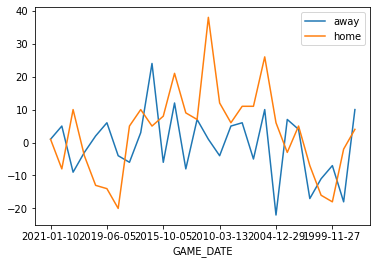

In [67]:
# plot the data, for better understanding
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
games_away.plot(x="GAME_DATE", y = 'PLUS_MINUS', ax=ax)
games_home.plot(x="GAME_DATE", y = 'PLUS_MINUS', ax=ax)
ax.legend(['away','home'])
plt.show()